## Strategy 1 🧬

### Overview
The approach includes running ggCaller on complete reference sequences and querying each MAG against these sequences to predict and impute missing values.


#### 1. **Handling Output Matrices**
   - **Result of Querying**: After querying, we got two matrices with the same dimensions:
     - A **Reference Matrix** derived from the reference sequences.
     - A **Queried Matrix** representing the MAG's genes presence (1) or absence (0).
   - **Imputation Task**: Impute the missing values in the MAGs using different methods.



In [36]:

import os
print(os.getcwd())



/Users/lale/Desktop/Imputation_workflow/datasets_runs/Bentley/Run1/strategy1


In [37]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [38]:
# Load n transpose the data
reference_matrix = pd.read_csv('ref.csv', index_col=0).T
simulated_MAGs_matrix = pd.read_csv('mags.csv', index_col=0).T


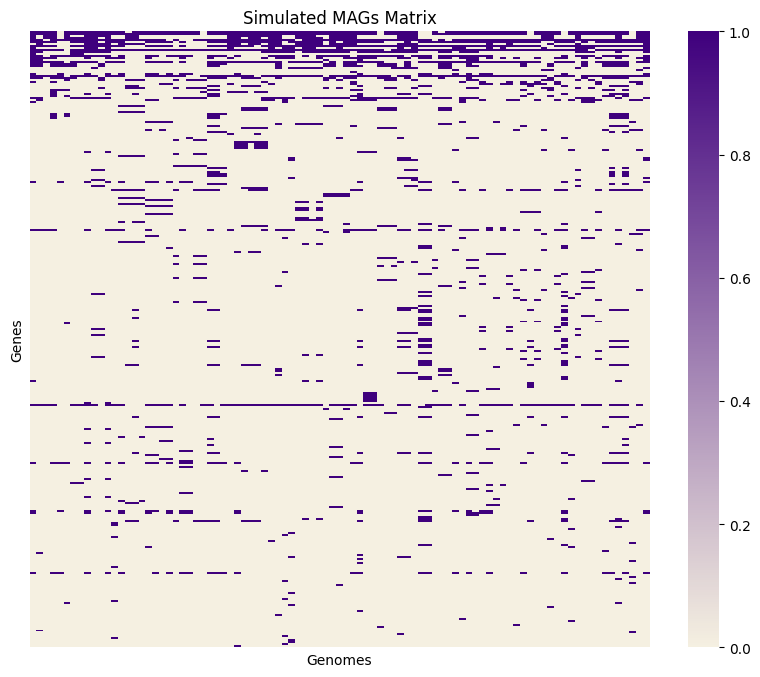

In [39]:
 
df = pd.read_csv('mags.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]  
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
plt.figure(figsize=(10, 8))
sns.heatmap(df, cmap=cmap)
plt.title('Simulated MAGs Matrix')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.yticks([])
plt.xticks([])
plt.show()


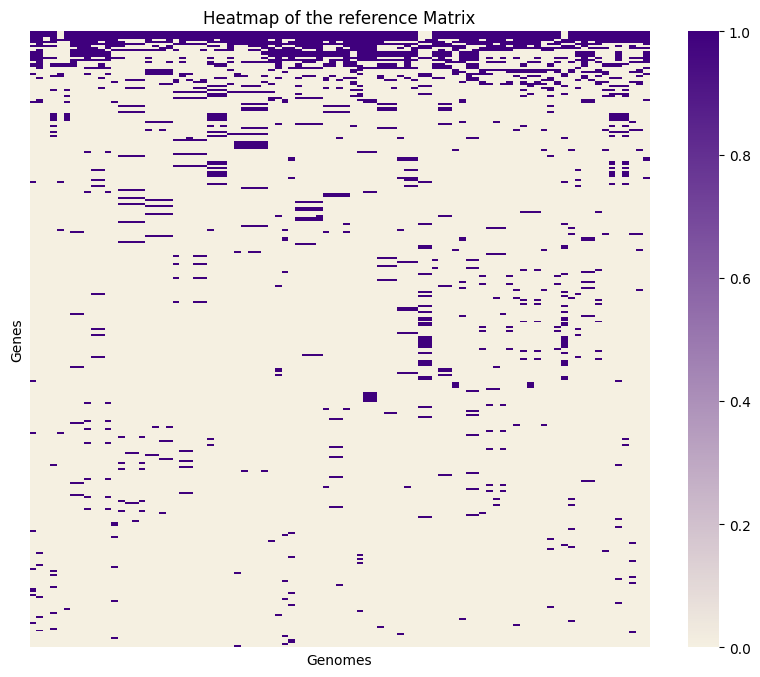

In [40]:
df2 = pd.read_csv('ref.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
plt.figure(figsize=(10, 8)) 
sns.heatmap(df2, cmap=cmap)
plt.title('Heatmap of the reference Matrix')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.yticks([])
plt.xticks([])
plt.show()

In [41]:
# Initialize DataFrame to store imputed matrices later
imputed_MAGs_matrix = pd.DataFrame()

imputed_MAGs_matrix2 = pd.DataFrame()

imputed_MAGs_matrix3 = pd.DataFrame()

imputed_MAGs_matrix4 = pd.DataFrame()


imputed_MAGs_matrix5 = pd.DataFrame()


imputed_MAGs_matrix6 = pd.DataFrame()

In [42]:
# Replace zeros with NaN
mask = simulated_MAGs_matrix == 0
simulated_MAGs_matrix[mask] = np.nan


In [43]:
 

for index, row in simulated_MAGs_matrix.iterrows():
    temporary_matrix = pd.concat([reference_matrix, row.to_frame().T])
    #print("Before Simple Imputation")
    #print(temporary_matrix)
    #print(row)
    for column in temporary_matrix.columns:
        #print(column)
        if temporary_matrix[column].isnull().any():
            #most_frequent_value = reference_matrix[column].mode()[0]
            #print(most_frequent_value)
            #imputer = SimpleImputer(strategy='constant', fill_value=most_frequent_value)
            imputer_1 = SimpleImputer(strategy='most_frequent')
            temporary_matrix[column] = imputer_1.fit_transform(temporary_matrix[[column]]).ravel()
    #print("After Imputation")
    #print(temporary_matrix)
    mag_name = index
    imputed_MAGs_matrix = pd.concat([imputed_MAGs_matrix, temporary_matrix.loc[[mag_name]]])
#print("Imputed MAGs Matrix Simple Imputation:")
imputed_MAGs_matrix = imputed_MAGs_matrix.astype(int)
#print(imputed_MAGs_matrix)

In [44]:

imputed_MAGs_matrix = imputed_MAGs_matrix.T
imputed_MAGs_matrix.to_csv('SimpleImputer_Imatrix.csv', index=True)


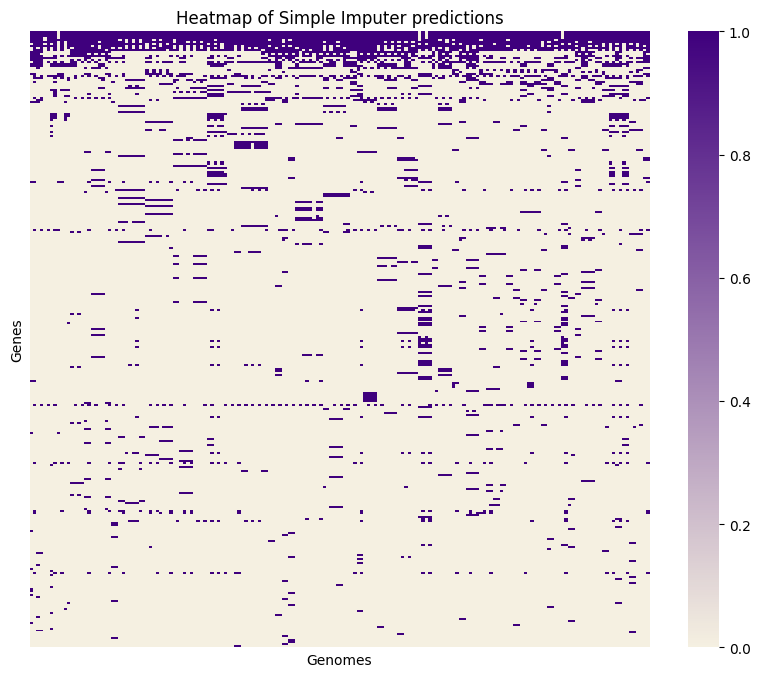

In [45]:
SI = pd.read_csv('SimpleImputer_Imatrix.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

plt.figure(figsize=(10, 8))  


sns.heatmap(SI, cmap=cmap )
plt.title('Heatmap of Simple Imputer predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.yticks([])
plt.xticks([])
plt.show()

In [46]:
def custom_round(x):  
    return np.where(x >= 0.5, 1, 0)
for index, row in simulated_MAGs_matrix.iterrows():
    temporary_matrix2 = pd.concat([reference_matrix, row.to_frame().T])
    #print("Before BayesianRidge Imputation")
    #print(temporary_matrix2)
    #print(row)
    for column in temporary_matrix2.columns:
        #print(column)
        if temporary_matrix2[column].isnull().any():
            imputer_2 = IterativeImputer(estimator=BayesianRidge())
            temporary_matrix2[column] = imputer_2.fit_transform(temporary_matrix2[[column]])
    #temporary_matrix2 = temporary_matrix2.round()
    temporary_matrix2 = temporary_matrix2.apply(custom_round)
    #print("After Imputation")
    #print(temporary_matrix2)
    mag_name = index
    imputed_MAGs_matrix2 = pd.concat([imputed_MAGs_matrix2, temporary_matrix2.loc[[mag_name]]])
#print("Imputed MAGs Matrix methode #BayesianRidge estimator(Default)#:")
imputed_MAGs_matrix2 = imputed_MAGs_matrix2.astype(int)
#print(imputed_MAGs_matrix2)

In [47]:
imputed_MAGs_matrix2 = imputed_MAGs_matrix2.T
imputed_MAGs_matrix2.to_csv('BayesianRidge_Imatrix_1.csv', index=True)

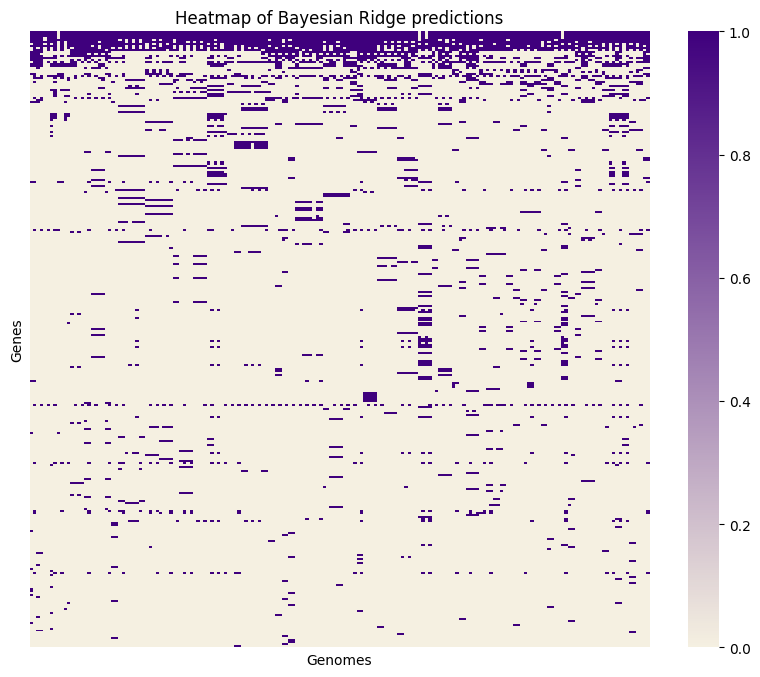

In [48]:
BR = pd.read_csv('BayesianRidge_Imatrix_1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
 
plt.figure(figsize=(10, 8))  

 
sns.heatmap(BR, cmap=cmap )
 
plt.title('Heatmap of Bayesian Ridge predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.yticks([])
plt.xticks([])
plt.show()

In [49]:
for index, row in simulated_MAGs_matrix.iterrows(): ###Ignore
    temporary_matrix3 = pd.concat([reference_matrix, row.to_frame().T])
   # print("Before DecisionTreeRegressor Imputation")
    #print(temporary_matrix3)
    #print(row)
    for column in temporary_matrix3.columns:
        #print(column)
        if temporary_matrix3[column].isnull().any():
            imputer_3 = IterativeImputer(estimator = DecisionTreeRegressor(max_features='sqrt', random_state=0))
            temporary_matrix3[column] = imputer_3.fit_transform(temporary_matrix3[[column]]).ravel()
    temporary_matrix3 = temporary_matrix3.round() #so the value wil be rounded to 0 or 1. gotta check the biological meaning of it ?
  #  
    #print("After Imputation")
   # 
    #print(temporary_matrix3)
    mag_name = index
    imputed_MAGs_matrix3 = pd.concat([imputed_MAGs_matrix3, temporary_matrix3.loc[[mag_name]]])
#print("Imputed MAGs Matrix methode #DecisionTreeRegressor#:")
imputed_MAGs_matrix3 = imputed_MAGs_matrix3.astype(int)
#print(imputed_MAGs_matrix3)
 

In [50]:
imputed_MAGs_matrix3 = imputed_MAGs_matrix3.T
imputed_MAGs_matrix3.to_csv('DTR_Imatrix_1.csv', index=True)

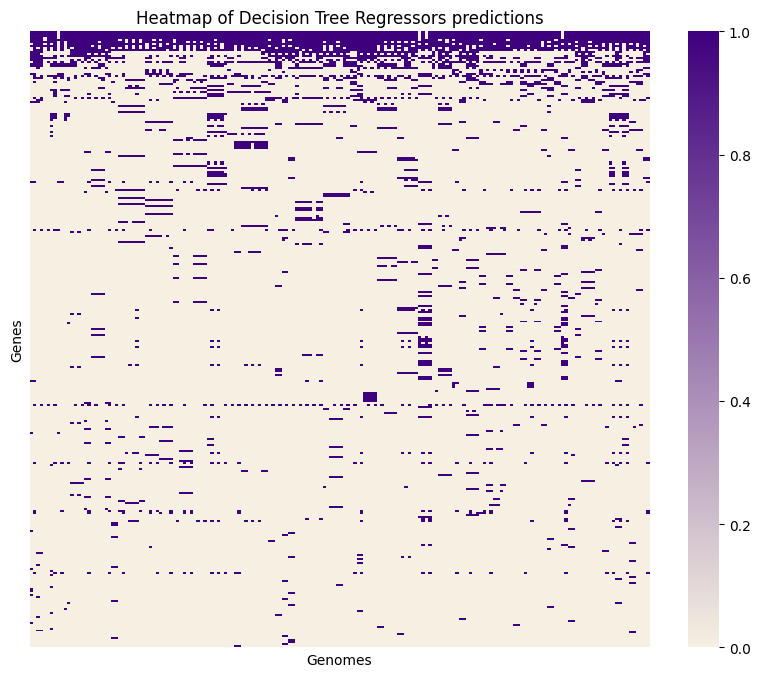

In [51]:
DTR = pd.read_csv('DTR_Imatrix_1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
 
plt.figure(figsize=(10, 8))  

 
sns.heatmap(DTR, cmap=cmap)
 
plt.title('Heatmap of Decision Tree Regressors predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.yticks([])
plt.xticks([])
plt.show()

In [52]:
for index, row in simulated_MAGs_matrix.iterrows(): #ignore
    temporary_matrix4 = pd.concat([reference_matrix, row.to_frame().T])
    #print("Before ExtraTreesRegressor Imputation")
   # print(temporary_matrix4)
    #print(row)
    for column in temporary_matrix4.columns:
        #print(column)
        if temporary_matrix4[column].isnull().any():
            imputer_4 = IterativeImputer(estimator = ExtraTreesRegressor(n_estimators=10, random_state=0))
            #imputer_4 = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=50, random_state=0, n_jobs=-1), max_iter=10, random_state=0)
            temporary_matrix4[column] = imputer_4.fit_transform(temporary_matrix4[[column]]).ravel()
    temporary_matrix4 = temporary_matrix4.round() #so the value wil be rounded to 0 or 1. gotta check the biological meaning of it ?
   # print("After Imputation")
    #print(temporary_matrix4)
    mag_name = index
    imputed_MAGs_matrix4 = pd.concat([imputed_MAGs_matrix4, temporary_matrix4.loc[[mag_name]]])
#print("Imputed MAGs Matrix methode #ExtraTreesRegressor#:")
imputed_MAGs_matrix4 = imputed_MAGs_matrix4.astype(int)
#print(imputed_MAGs_matrix4)

In [53]:
imputed_MAGs_matrix4 = imputed_MAGs_matrix4.T
imputed_MAGs_matrix4.to_csv('ETR_Imatrix_1.csv', index=True)

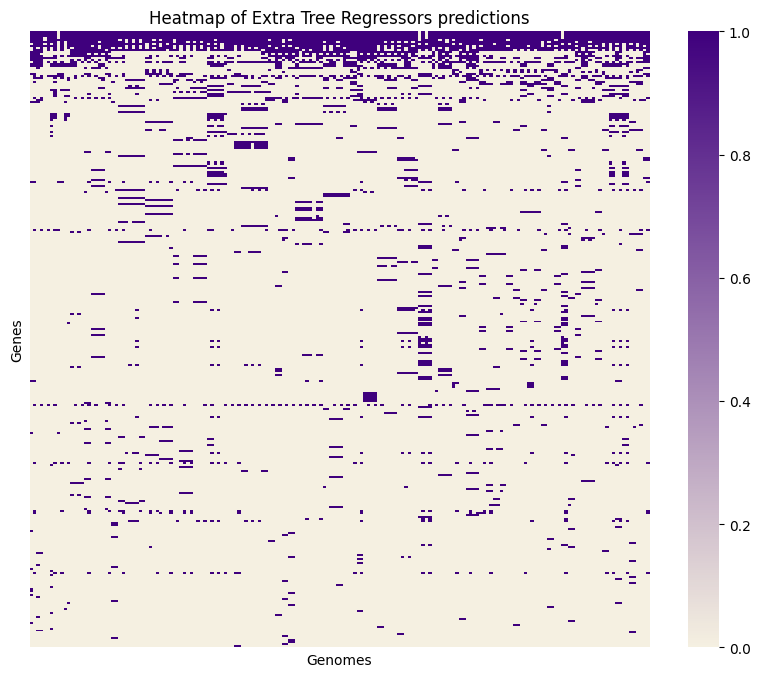

In [54]:
ETR = pd.read_csv('ETR_Imatrix_1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
 
plt.figure(figsize=(10, 8))   
 
sns.heatmap(ETR, cmap=cmap)
 
plt.title('Heatmap of Extra Tree Regressors predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.yticks([])
plt.xticks([])
plt.show()

In [55]:
for index, row in simulated_MAGs_matrix.iterrows(): 
    temporary_matrix5 = pd.concat([reference_matrix, row.to_frame().T])
  #  print("Before Imputation")
   # print(temporary_matrix5)
    #print(row)
    for column in temporary_matrix5.columns:
        #print(column)
        if temporary_matrix5[column].isnull().any():
            imputer_5 = IterativeImputer(estimator = KNeighborsRegressor(n_neighbors=1))
            temporary_matrix5[column] = imputer_5.fit_transform(temporary_matrix5[[column]]).ravel()
    temporary_matrix5 = temporary_matrix5.round() #so the value wil be rounded to 0 or 1. gotta check the biological meaning of it ?
  #  print("After Imputation")
   # print(temporary_matrix5)
    mag_name = index
    imputed_MAGs_matrix5 = pd.concat([imputed_MAGs_matrix5, temporary_matrix5.loc[[mag_name]]])
#print("Imputed MAGs Matrix methode #KNeighborsRegressor#:")
imputed_MAGs_matrix5 = imputed_MAGs_matrix5.astype(int)
#print(imputed_MAGs_matrix5)

In [56]:
imputed_MAGs_matrix5 = imputed_MAGs_matrix5.T
imputed_MAGs_matrix5.to_csv('KNR_Imatrix_1.csv', index=True)

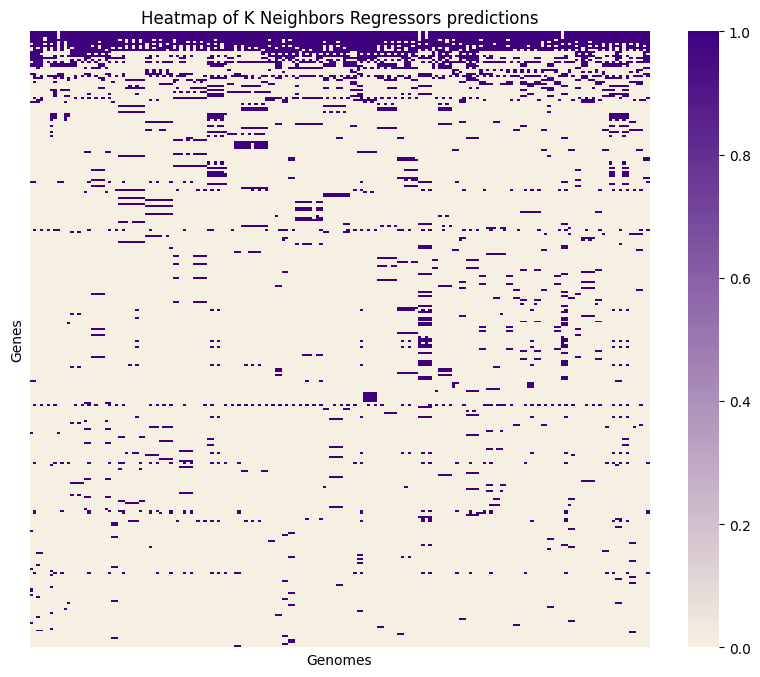

In [57]:
KNR = pd.read_csv('KNR_Imatrix_1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
 
plt.figure(figsize=(10, 8))   
 
sns.heatmap(KNR, cmap=cmap)
 
plt.title('Heatmap of K Neighbors Regressors predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.yticks([])
plt.xticks([])
plt.show()

In [58]:
for index, row in simulated_MAGs_matrix.iterrows():  
    temporary_matrix6 = pd.concat([reference_matrix, row.to_frame().T])
 
    for column in temporary_matrix6.columns:
        #print(column)
        if temporary_matrix6[column].isnull().any():
            imputer_6 = KNNImputer(n_neighbors=1, weights="distance")
            temporary_matrix6[column] = imputer_6.fit_transform(temporary_matrix6[[column]]).ravel()
 
    temporary_matrix6 = temporary_matrix6.round()
 
    mag_name = index
    imputed_MAGs_matrix6 = pd.concat([imputed_MAGs_matrix6, temporary_matrix6.loc[[mag_name]]])
#print("Imputed MAGs Matrix methode #KNNImputer#:")
imputed_MAGs_matrix6 = imputed_MAGs_matrix6.astype(int)
#print(imputed_MAGs_matrix6)

In [59]:
imputed_MAGs_matrix6 = imputed_MAGs_matrix6.T
imputed_MAGs_matrix6.to_csv('KNN_Imatrix_1.csv', index=True)

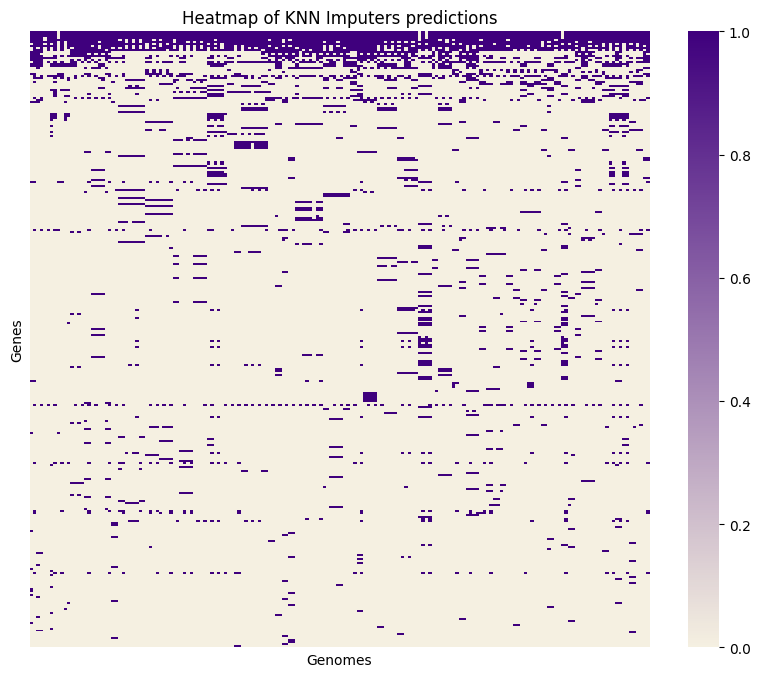

In [60]:
KNN = pd.read_csv('KNN_Imatrix_1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

plt.figure(figsize=(10, 8))  

sns.heatmap(KNN, cmap=cmap)
 
plt.title('Heatmap of KNN Imputers predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.yticks([])
plt.xticks([])
plt.show()

## CF

In [61]:
import sys
import surprise
import pandas as pd
from surprise import SVD, Dataset, Reader

In [62]:
SEED = 42
np.random.seed(SEED)


In [63]:
simulated_MAGs = simulated_MAGs_matrix

In [64]:
def transform_to_surprise_format(df):
    """Transform the DataFrame into a list of tuples suitable for Surprise.
       Each tuple consists of (user, item, rating) where 'user' is the index,
       'item' is the column, and 'rating' is the value at df[item][user] -> (gene, genome, presence 1 or absence 0)
    """
    rows, cols = df.shape
    interactions = []
    for i in range(rows):
        for j in range(cols):
            if not pd.isna(df.iloc[i, j]):
                interactions.append((df.index[i], df.columns[j], df.iloc[i, j]))
    return interactions


In [65]:
reader = Reader(rating_scale=(0, 1))
ground_truth_data = Dataset.load_from_df(pd.DataFrame(transform_to_surprise_format(reference_matrix),
                                                      columns=['MAG', 'Gene', 'Value']),
                                         reader)

# Train the SVD algorithm on the ground truth data
trainset = ground_truth_data.build_full_trainset()
svd = SVD(random_state=SEED)
svd.fit(trainset)


In [66]:
def fill_missing_values_svd(df, algo):
    """ Fill missing values in the DataFrame using the SVD algorithm """
    filled_df = df.copy()
    for index, row in df.iterrows():
        for col in df.columns:
            if pd.isna(row[col]):
                pred = algo.predict(index, col).est
                # Round predictions to 0 or 1
                pred = 1 if pred >= 0.5 else 0
                filled_df.at[index, col] = pred
    return filled_df

In [67]:
filled_simulated_MAGs = fill_missing_values_svd(simulated_MAGs, svd)


In [68]:
filled_simulated_MAGs = filled_simulated_MAGs.T
filled_simulated_MAGs = filled_simulated_MAGs.astype(int)
filled_simulated_MAGs.to_csv('CF_SVD_1.csv', index=True)

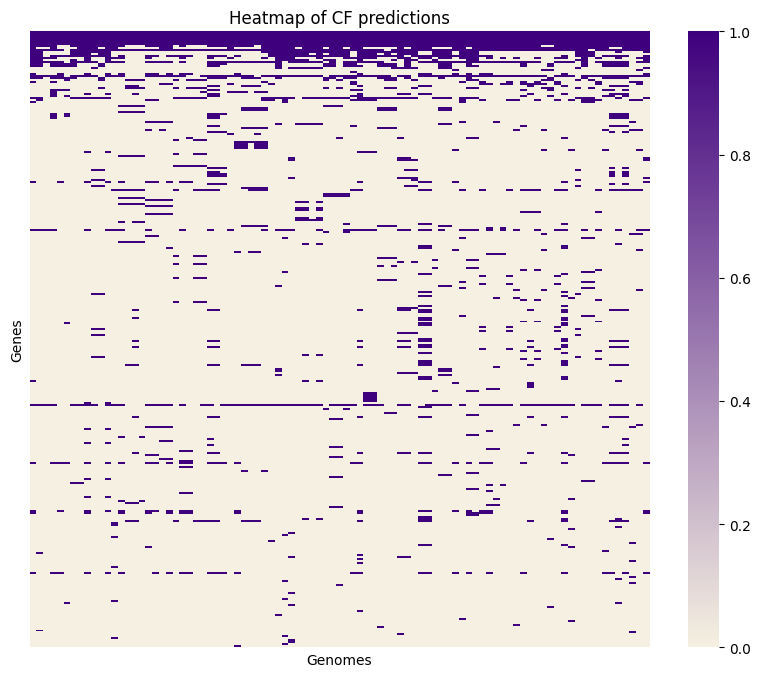

In [69]:
CF = pd.read_csv('CF_SVD_1.csv', index_col=0)
colors = ["#f5f0e1", "#3f007d"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors) 
plt.figure(figsize=(10, 8))  
sns.heatmap(CF, cmap=cmap)
plt.title('Heatmap of CF predictions')
plt.xlabel('Genomes')
plt.ylabel('Genes')
plt.yticks([])
plt.xticks([])
plt.show()